In [1]:
import pandas as pd
import numpy as np
import math 
from math import pi,sqrt, cos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [49]:
student_mat=pd.read_csv("student-mat.csv")

In [97]:
student_mat.shape

(395, 33)

In [50]:
student_por=pd.read_csv("student-por.csv")

In [98]:
student_por.shape

(649, 33)

In [51]:
student_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [52]:
student_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [300]:
df=pd.concat([student_mat,student_por])

In [284]:
df.shape

(1044, 33)

In [134]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
## Drop the dupliactes

In [358]:
df=df.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [286]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.119031,-0.133645,0.014530,0.001454,0.280021,-0.008453,-0.002414,0.094744,0.130655,0.069320,-0.013347,0.168313,-0.113206,-0.130408,-0.127446
Medu,-0.119031,1.000000,0.635156,-0.239830,0.104501,-0.163166,0.010211,-0.011450,0.022866,-0.018013,-0.036381,-0.002183,0.095703,0.208172,0.202776,0.182611
Fedu,-0.133645,0.635156,1.000000,-0.189146,0.045236,-0.170862,0.016171,0.009450,0.053071,-0.008774,0.032370,0.038402,0.068048,0.185636,0.156541,0.137159
traveltime,0.014530,-0.239830,-0.189146,1.000000,-0.066172,0.078820,-0.010459,-0.007536,0.039607,0.084199,0.060548,-0.045230,-0.049896,-0.071572,-0.111347,-0.073488
studytime,0.001454,0.104501,0.045236,-0.066172,1.000000,-0.125250,0.003935,-0.077845,-0.078264,-0.139678,-0.220301,-0.054130,-0.039015,0.172011,0.133655,0.097863
failures,0.280021,-0.163166,-0.170862,0.078820,-0.125250,1.000000,-0.068134,0.114463,0.060217,0.088939,0.084924,0.035372,0.087584,-0.368938,-0.360881,-0.359377
famrel,-0.008453,0.010211,0.016171,-0.010459,0.003935,-0.068134,1.000000,0.140165,0.091317,-0.069881,-0.092647,0.109476,-0.067647,0.060893,0.052807,0.061296
freetime,-0.002414,-0.011450,0.009450,-0.007536,-0.077845,0.114463,0.140165,1.000000,0.332688,0.117690,0.127746,0.088609,-0.042332,-0.040185,-0.061199,-0.058860
goout,0.094744,0.022866,0.053071,0.039607,-0.078264,0.060217,0.091317,0.332688,1.000000,0.252217,0.404503,0.002163,0.025046,-0.093786,-0.091030,-0.081691
Dalc,0.130655,-0.018013,-0.008774,0.084199,-0.139678,0.088939,-0.069881,0.117690,0.252217,1.000000,0.618431,0.065323,0.125517,-0.112935,-0.084944,-0.075212


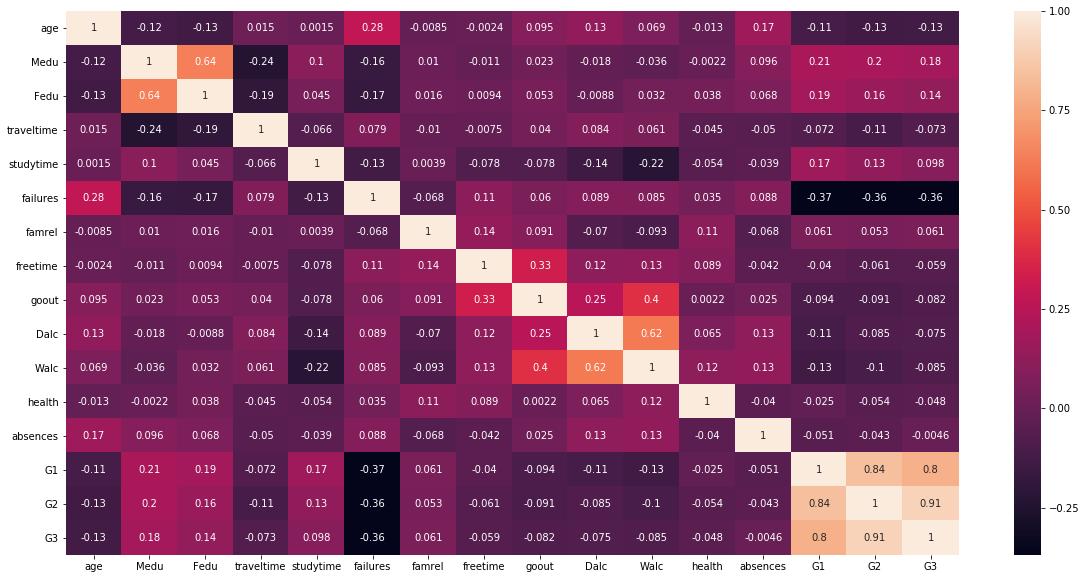

In [142]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True )
plt.show()


In [290]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
dtype: object

In [302]:
df.shape

(662, 33)

In [312]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3'],
      dtype='object')

In [307]:
df=df.drop('G2',axis=1)

In [309]:
cat_cols=['school','sex','address','famsize','Pstatus','guardian','schoolsup','Mjob','Fjob','reason','guardian','famsup','paid','activities','nursery','higher','internet']

In [310]:
df[cat_cols]=df[cat_cols].astype('category')

In [373]:
num_cols=[]
for i in df.columns:
    if(i not in cat_cols):
        num_cols.append(i)

In [374]:
num_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G3']

In [372]:
df=df.drop('G1',axis=1)

In [375]:
num_cols.remove('G3')

In [340]:
df=le

In [376]:
X=df.drop('G3',axis=1)

In [377]:
y=df['G3']

In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [379]:
X_train=pd.get_dummies(X_train,drop_first=True)

In [380]:
X_test=pd.get_dummies(X_test,drop_first=True)

In [381]:
from sklearn.preprocessing import StandardScaler
stdzer = StandardScaler()
stdzer.fit(X_train[num_cols])

X_train[num_cols] = stdzer.transform(X_train[num_cols])
X_test[num_cols] = stdzer.transform(X_test[num_cols])

In [382]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(X_train, y_train)

In [383]:
linear_model.get_params
linear_model.score(X_train, y_train)

0.23768421334853385

In [384]:
y_pred = linear_model.predict(X_test)

In [385]:
from sklearn.metrics import r2_score
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.03858586115364637


In [184]:
X_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes'],
      dtype='object')

In [185]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Medu', 'Fedu',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G3'],
      dtype='object')

In [186]:
df.dtypes

school        category
sex           category
age              int64
address       category
famsize       category
Medu             int64
Fedu             int64
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G3               int64
dtype: object

In [318]:
df.dtypes

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian        object
traveltime       int64
studytime        int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G3               int64
dtype: object

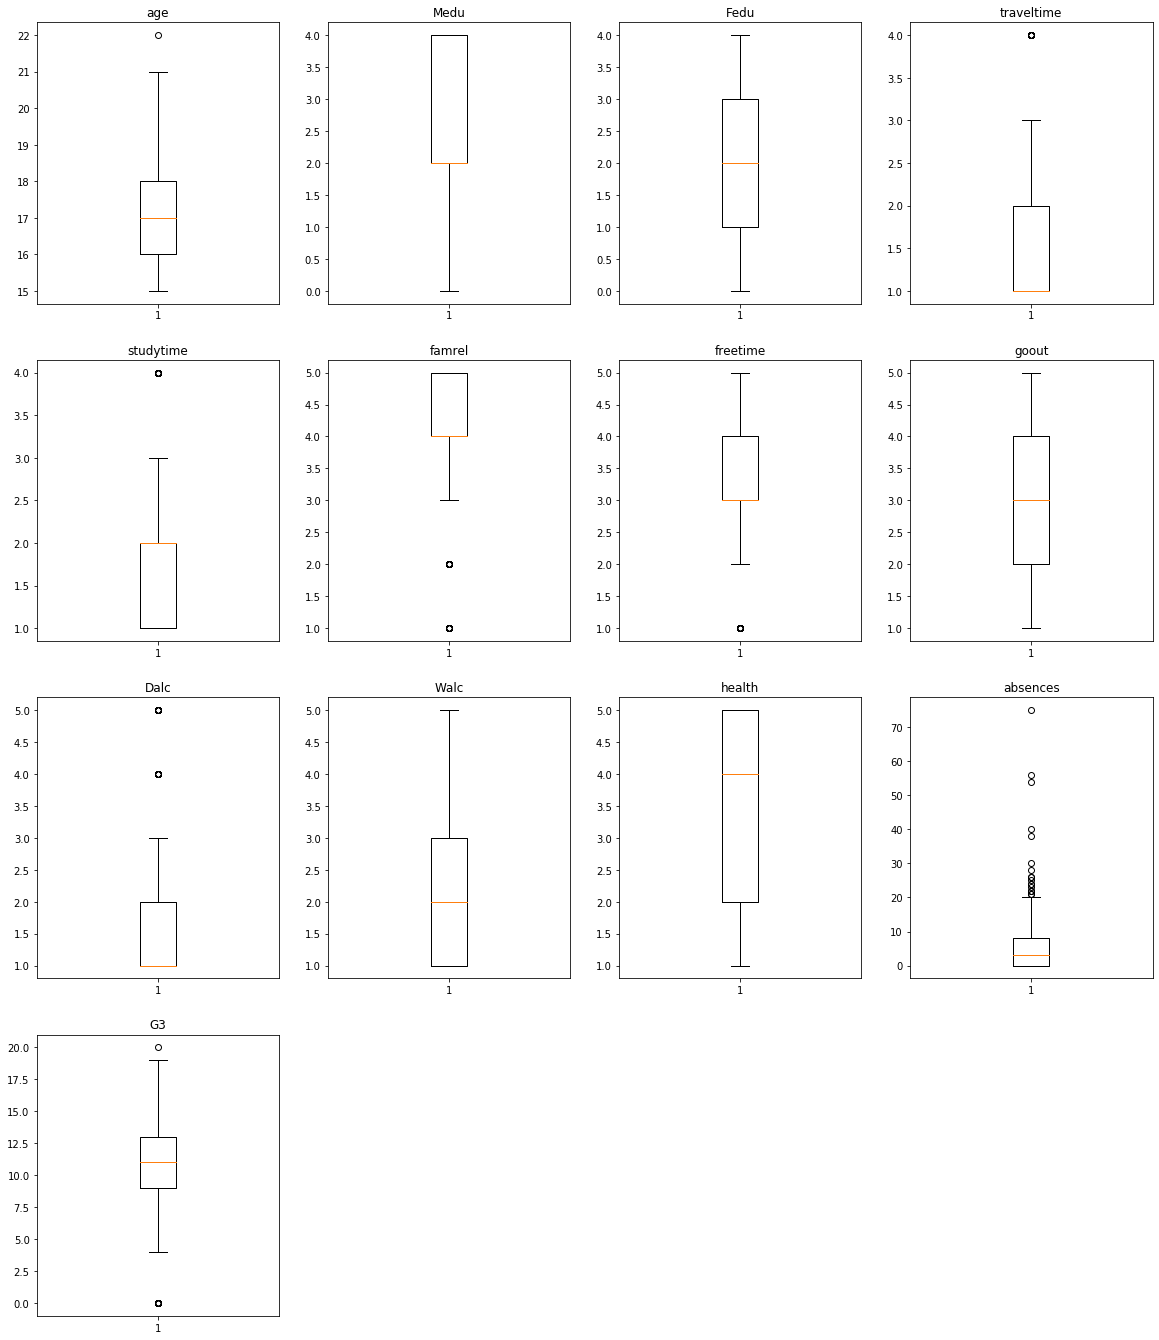

In [319]:
# Create a dictionary of columns.
col_dict = {'age':1,'Medu':2,'Fedu':3,
            'traveltime':4,'studytime':5,'famrel':6,
            'freetime':7,'goout':8,'Dalc':9,'Walc':10,'health':11,'absences':12,'G3':13}





# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()



In [320]:
le=df

In [321]:
### Way to handle it:

# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(le[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0])),len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0]))*100/1987))
    
    
    


Number of outliers and percentage of it in age : 1 and 0.050327126321087066
Number of outliers and percentage of it in Medu : 0 and 0.0
Number of outliers and percentage of it in Fedu : 0 and 0.0
Number of outliers and percentage of it in traveltime : 16 and 0.8052340211373931
Number of outliers and percentage of it in studytime : 35 and 1.7614494212380474
Number of outliers and percentage of it in famrel : 50 and 2.5163563160543534
Number of outliers and percentage of it in freetime : 47 and 2.365374937091092
Number of outliers and percentage of it in goout : 0 and 0.0
Number of outliers and percentage of it in Dalc : 35 and 1.7614494212380474
Number of outliers and percentage of it in Walc : 0 and 0.0
Number of outliers and percentage of it in health : 0 and 0.0
Number of outliers and percentage of it in absences : 18 and 0.9058882737795672
Number of outliers and percentage of it in G3 : 46 and 2.315047810770005


In [ ]:
traveltime,studytime,famrel,Dalc,absences,freetime

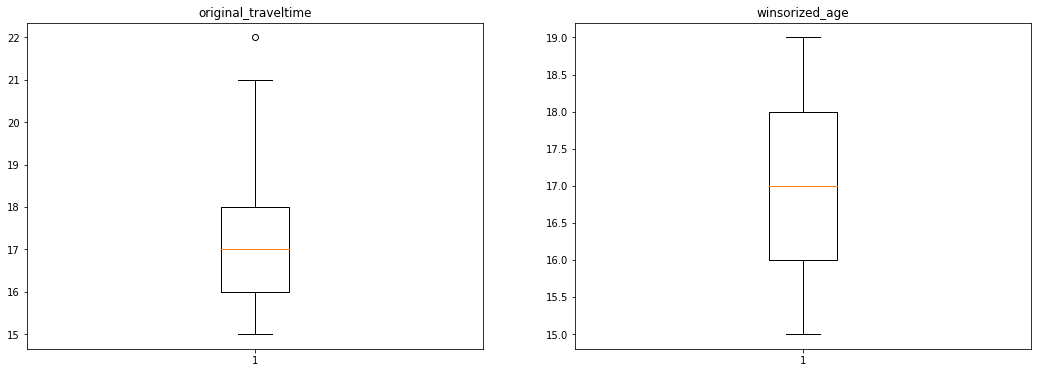

In [322]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize age
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_traveltime = le['age']
plt.boxplot(original_traveltime)
plt.title("original_traveltime")

plt.subplot(1,2,2)
winsorized_age = winsorize(le['age'],(0,0.05))### first one is for lower and second is for upper
plt.boxplot(winsorized_age)
plt.title("winsorized_age")

plt.show()    


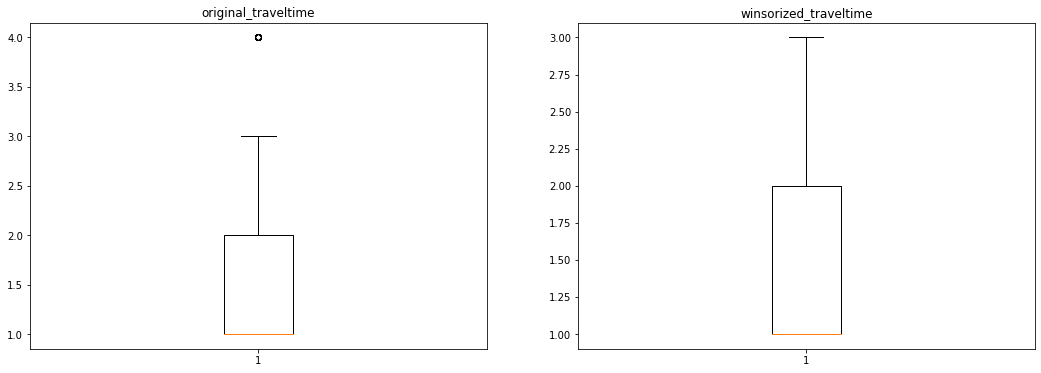

In [323]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize traveltime
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_traveltime = le['traveltime']
plt.boxplot(original_traveltime)
plt.title("original_traveltime")

plt.subplot(1,2,2)
winsorized_traveltime = winsorize(le['traveltime'],(0,0.08))### first one is for lower and second is for upper
plt.boxplot(winsorized_traveltime)
plt.title("winsorized_traveltime")

plt.show()    


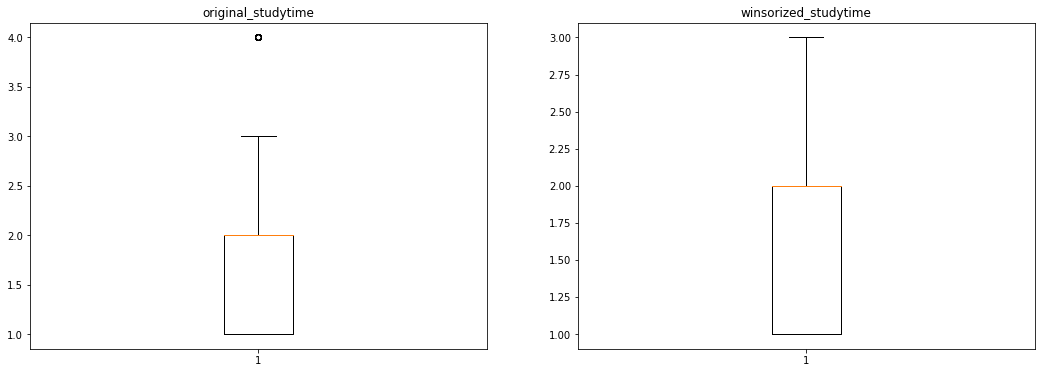

In [324]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize studytime
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_studytime = le['studytime']
plt.boxplot(original_studytime)
plt.title("original_studytime")

plt.subplot(1,2,2)
winsorized_studytime = winsorize(le['studytime'],(0,0.17))### first one is for lower and second is for upper
plt.boxplot(winsorized_studytime)
plt.title("winsorized_studytime")

plt.show()    


In [325]:
le=le.drop('failures',axis=1)

KeyError: "['failures'] not found in axis"

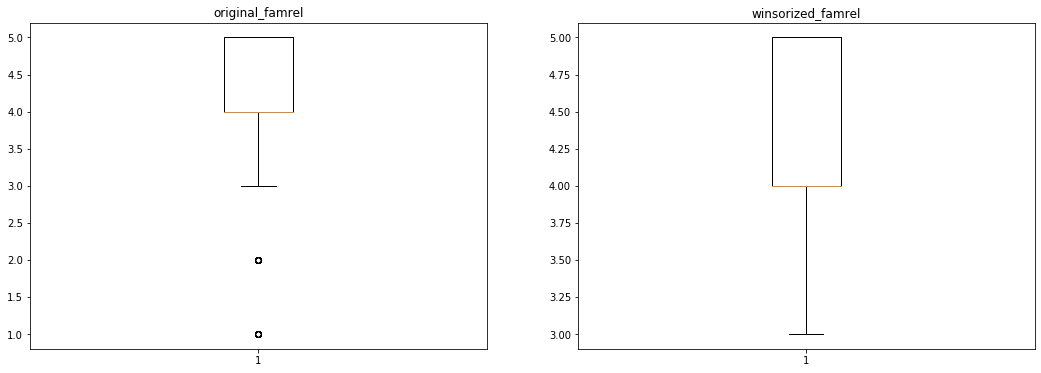

In [326]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize famrel
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_famrel = le['famrel']
plt.boxplot(original_famrel)
plt.title("original_famrel")

plt.subplot(1,2,2)
winsorized_famrel = winsorize(le['famrel'],(0.2,0))### first one is for lower and second is for upper
plt.boxplot(winsorized_famrel)
plt.title("winsorized_famrel")

plt.show()    


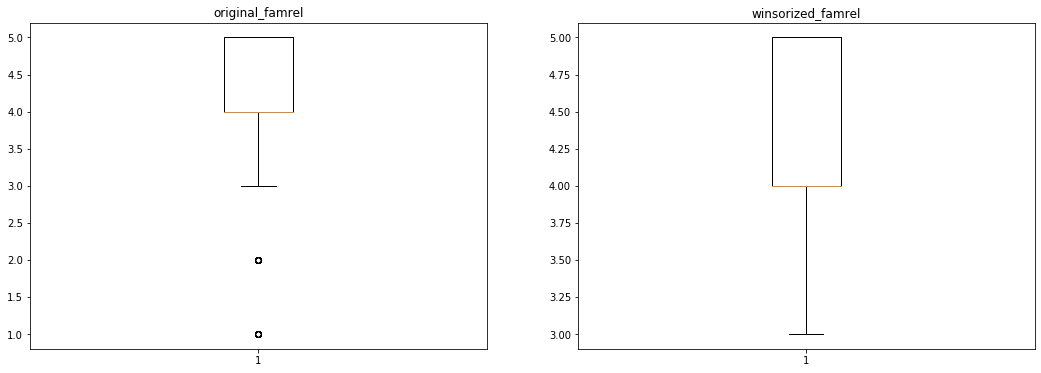

In [327]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize famrel
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_famrel = le['famrel']
plt.boxplot(original_famrel)
plt.title("original_famrel")

plt.subplot(1,2,2)
winsorized_famrel = winsorize(le['famrel'],(0.2,0))### first one is for lower and second is for upper
plt.boxplot(winsorized_famrel)
plt.title("winsorized_famrel")

plt.show()    


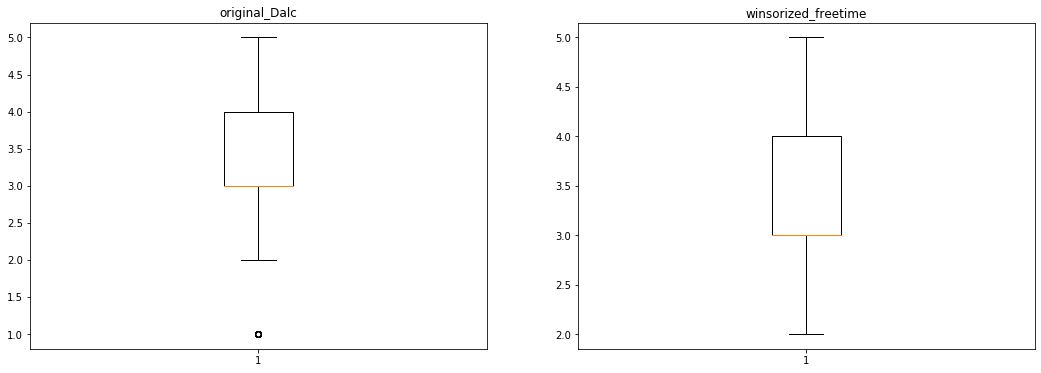

In [328]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize freetime
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Dalc = le['freetime']
plt.boxplot(original_Dalc)
plt.title("original_Dalc")

plt.subplot(1,2,2)
winsorized_freetime = winsorize(le['freetime'],(0.2,0))### first one is for lower and second is for upper
plt.boxplot(winsorized_freetime)
plt.title("winsorized_freetime")

plt.show()    


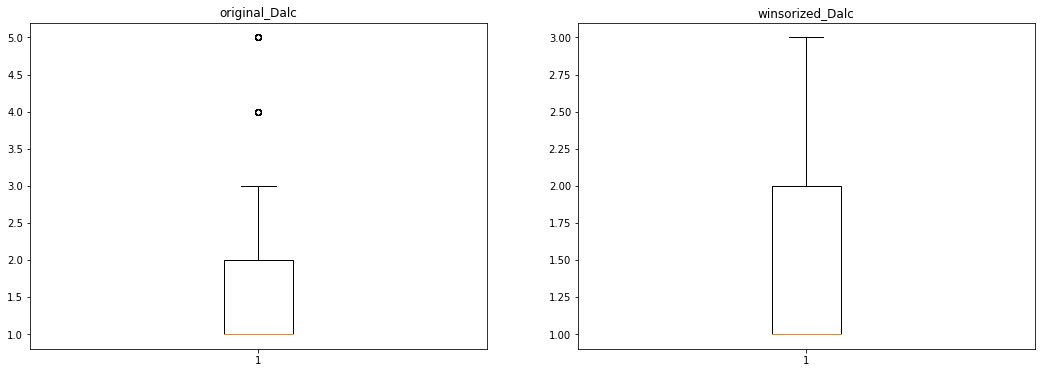

In [329]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize Dalc
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Dalc = le['Dalc']
plt.boxplot(original_Dalc)
plt.title("original_Dalc")

plt.subplot(1,2,2)
winsorized_Dalc = winsorize(le['Dalc'],(0,0.1))### first one is for lower and second is for upper
plt.boxplot(winsorized_Dalc)
plt.title("winsorized_Dalc")

plt.show()    


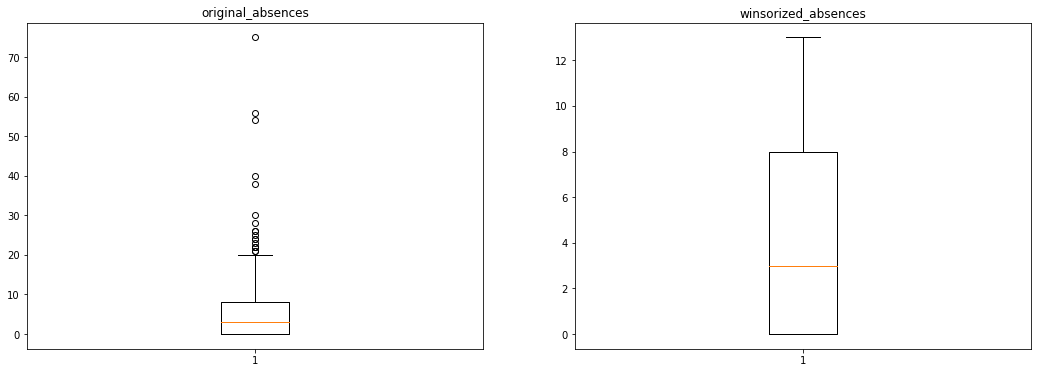

In [330]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize absences
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_absences = le['absences']
plt.boxplot(original_absences)
plt.title("original_absences")

plt.subplot(1,2,2)
winsorized_absences = winsorize(le['absences'],(0,0.09))### first one is for lower and second is for upper
plt.boxplot(winsorized_absences)
plt.title("winsorized_absences")

plt.show()    


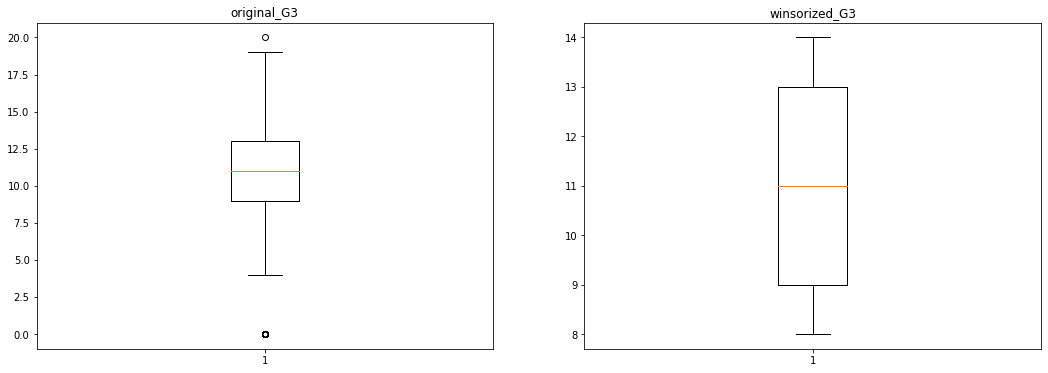

In [331]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize G3
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_G3 = le['G3']
plt.boxplot(original_G3)
plt.title("original_G3")

plt.subplot(1,2,2)
winsorized_G3 = winsorize(le['G3'],(0.2,0.2))### first one is for lower and second is for upper
plt.boxplot(winsorized_G3)
plt.title("winsorized_G3")

plt.show()    


In [332]:
le.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3'],
      dtype='object')

In [333]:
num_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [336]:
le.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3'],
      dtype='object')

In [337]:
le.dtypes

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian        object
traveltime       int64
studytime        int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G3               int64
dtype: object

In [338]:
df=le

In [339]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3'],
      dtype='object')

In [ ]:
# G3 w.r.t famsize using bar plot.
plt.figure(figsize=(6,6))
plt.bar(le.groupby('famsize')['famsize'].count().index,le.groupby('famsize')['G3'].mean())
plt.xlabel("famsize",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

In [253]:
y_train.shape

(529,)

In [254]:
X_train.shape

(529, 25)

In [386]:
# mean squared error
mse = np.sum((y_pred - y_test)**2)

# root mean squared error
# m is the number of training examples
rmse = np.sqrt(mse/529)

In [387]:
rmse

2.0679189963226827

In [351]:
from sklearn.metrics import mean_squared_error

In [388]:
lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print("Linear Regression MSE on val: %.4f" %lr_mse)
print('Linear Regression RMSE on val: %.4f' % lr_rmse)

Linear Regression MSE on val: 17.0087
Linear Regression RMSE on val: 4.1242


In [389]:
y_true=y_test

In [390]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [355]:
print(mean_absolute_percentage_error(y_true,y_pred))

18.27461249290744


In [266]:
le.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Medu', 'Fedu',
       'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [267]:
df3=le

In [269]:
df3['Dalc'] = df3['Dalc'] + df3['Walc']
#combine mother's education with father's education & call it parent's education
df3['Pedu'] = df3['Medu'] + df3['Fedu']
# combine goout and absences
df3['goout'] = df3['goout'] + df3['absences']
df3 = df3.drop(['Walc','Medu','Fedu','absences'],axis=1)
df3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'guardian', 'traveltime',
       'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health',
       'G3', 'Pedu'],
      dtype='object')

In [356]:
########

In [357]:
df=pd.concat([student_mat,student_por])

In [359]:
df.shape

(662, 33)

In [361]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [360]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [362]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [364]:
df=df.drop('address',axis=1)

In [366]:
df.dtypes

school        object
sex           object
age            int64
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [367]:
cat_cols=['school','sex','famsize',
          'Pstatus','guardian','schoolsup','Mjob','Fjob',
          'reason','famsup','paid','activities','nursery',
          'higher','internet','romantic']

In [368]:
df[cat_cols]=df[cat_cols].astype('category')